In [12]:
#Supporting packages for analysis
import numpy as np
import pandas as pd

#KSTAR imports
from kstar.plot import DotPlot

import sys
sys.path.append('../')
import conf #This is the local config file for setting the supplements directory to your local environment


#Set matplotlib defaults for arial 12 point font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 12
import matplotlib.pyplot as plt

#Directory where KSTAR Supplemental data was set 
odir = conf.SUPPLEMENTS_DIR+'BreastCancer (Fig6)/PDX_Huang2017'

#load the Mann Whitney activities and FPR for Tyrosine predictions, 
#it will be faster and less data than loading all KSTAR outputs
activities = pd.read_csv(odir+'/RESULTS/PDX_Y_mann_whitney_activities.tsv', sep='\t', index_col=0)
fpr = pd.read_csv(odir+'/RESULTS/PDX_Y_mann_whitney_fpr.tsv', sep='\t', index_col=0)


#Get information about the samples, such as HER2 status
s1 = pd.read_csv(odir+'/Supplementary_Data_1_dataCols.csv')

In [13]:
# Set the column labels to just have the WHIM labels so it is easier to read (make an x_label_dict)
x_label_dict = {}
for label in activities.columns:
    l = label.strip('data:')
    l_arr = l.split('.')
    if l_arr[0] == 'WHIM13': #there are two WHIM13 samples and they have different results
        x_label_dict[label] = l_arr[0]+'_0'+l_arr[1][-1] #add last one digits
    else:
        x_label_dict[label] = l_arr[0]
        
#set preferred kinase names (make a kinase_dict)
kinase_dict = {}
for kinase in activities.index:
    kinase_dict[kinase] = conf.KINASE_MAP.loc[kinase,'Preferred Name']

In [14]:
alpha = 0.05
results = activities
results = -np.log10(results)



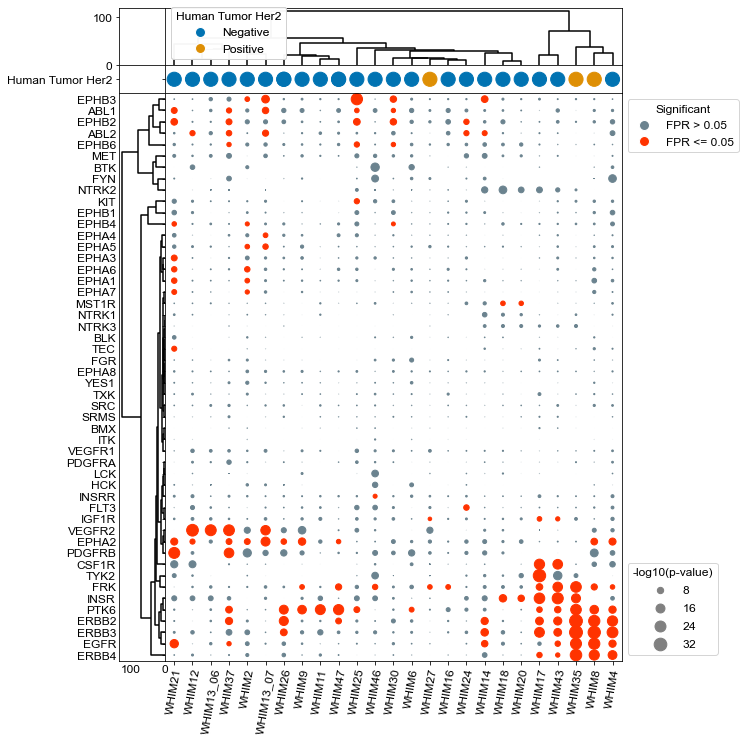

In [8]:
#Setup a figure with a context strip at the top for HER2 status and activity dots on the below axis
fig, axes = plt.subplots(figsize = (9, 12), 
        nrows = 3, ncols = 2, 
        sharex = 'col', 
        sharey = 'row',
        gridspec_kw = {
            'height_ratios':[.1,0.05, 1], 
            'width_ratios':[0.1,1]
        },)
fig.subplots_adjust(wspace=0, hspace=0)

dots = DotPlot(results, 
                       fpr, 
                       alpha=alpha,
                       figsize = (9,12), 
                       dotsize = 5, 
                       legend_title='-log10(p-value)', 
                       x_label_dict=x_label_dict,
                       kinase_dict = kinase_dict)

#Cluster changes the sorting of the values array, so be sure to plot context last so that it is in the same sort.
dots.cluster(orientation = 'left', ax = axes[2,0], method='ward')
dots.cluster(orientation = 'top', ax = axes[0,1], method='ward')
dots.context(ax=axes[1,1],info = s1, id_column = 'Sample', context_columns = ['Human Tumor Her2'], orientation = 'top', dotsize =200, markersize= 10 )

dots.dotplot(ax = axes[2,1])
plt.xticks(rotation = 80, fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig(odir+'PDX_all.pdf', bbox_inches='tight')

(array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
        135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255,
        265, 275, 285, 295, 305]),
 [])

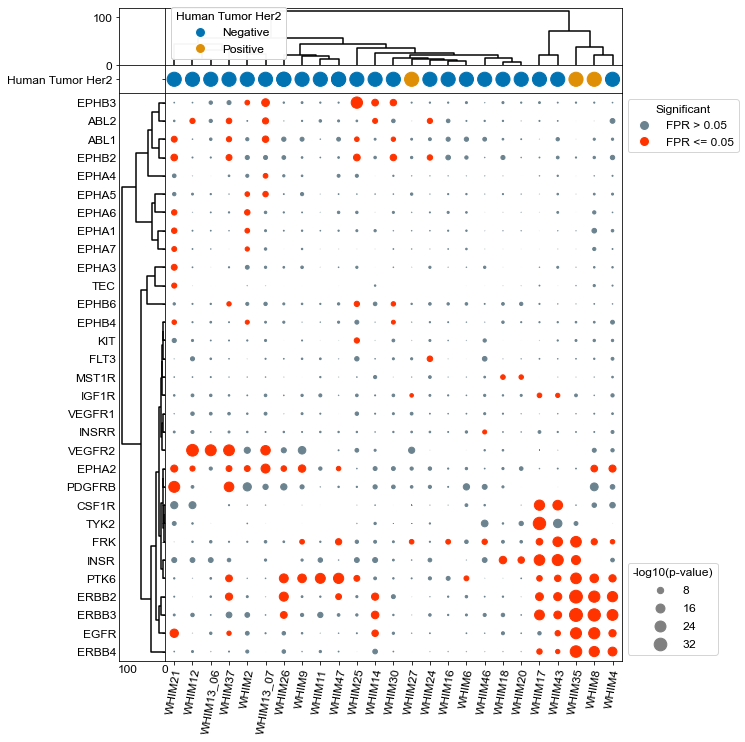

In [10]:
#Setup a figure with a context strip at the top for HER2 status and activity dots on the below axis
fig, axes = plt.subplots(figsize = (9, 12), 
        nrows = 3, ncols = 2, 
        sharex = 'col', 
        sharey = 'row',
        gridspec_kw = {
            'height_ratios':[.1,0.05, 1], 
            'width_ratios':[0.1,1]
        },)
fig.subplots_adjust(wspace=0, hspace=0)

dots = DotPlot(results, 
                       fpr, 
                       alpha=alpha,
                       figsize = (9,12), 
                       dotsize = 5, 
                       legend_title='-log10(p-value)', 
                       x_label_dict=x_label_dict,
                       kinase_dict = kinase_dict)

dots.drop_kinases_with_no_significance()

#Cluster changes the sorting of the values array, so be sure to plot context last so that it is in the same sort.
dots.cluster(orientation = 'left', ax = axes[2,0], method='ward')
dots.cluster(orientation = 'top', ax = axes[0,1], method='ward')
dots.context(ax=axes[1,1],info = s1, id_column = 'Sample', context_columns = ['Human Tumor Her2'], orientation = 'top', dotsize =200, markersize= 10 )

dots.dotplot(ax = axes[2,1])
plt.xticks(rotation = 80, fontsize=12)
plt.yticks(fontsize=12)
#plt.savefig(odir+'PDX_nonSignificantDropped.pdf', bbox_inches='tight')

(array([ 5, 15, 25, 35]),
 [Text(5, 0, 'WHIM35'),
  Text(15, 0, 'WHIM8'),
  Text(25, 0, 'WHIM14'),
  Text(35, 0, 'WHIM6')])

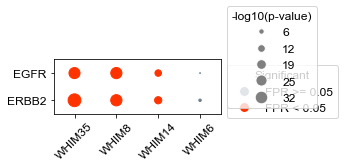

In [15]:
# Plot ERBB receptors just for the WHIM lines treated
#from lapatinib treatment

alpha = 0.05

#additional lines
toKeep = {'data:WHIM35.PDXBC08':'WHIM35', 'data:WHIM8.PDXBC01':'WHIM8', 
          'data:WHIM14.PDXBC02':'WHIM14', 'data:WHIM6.PDXBC03':'WHIM6'} 
results = activities

results = results[toKeep.keys()]
fpr = fpr[toKeep.keys()]
results = -np.log10(results)

kinases = list(results.index)
kinases.remove('EGFR')
kinases.remove('ERBB2')

fig, axes = plt.subplots(figsize = (3,1))
fig.subplots_adjust(wspace=0, hspace=0)

dots = DotPlot(results, 
                       fpr,
                       alpha=alpha,
                       inclusive_alpha=False,
                       figsize = (3,1), 
                       dotsize = 5, 
                       legend_title='-log10(p-value)',
                        x_label_dict=toKeep)
dots.drop_kinases(kinases)

dots.dotplot(axes, max_size=32)
plt.xticks(rotation = 45, fontsize=12)
#plt.savefig(odir+'PDX_WHIM_lapatinibOnly.pdf', bbox_inches='tight')
